### Norrick, Chad - Classification Project - telco churn

#### 5 Apr 19

Answers to all questions from the project rubric located at the following link, in a file named __Appendix.docx:

https://docs.google.com/document/d/e/2PACX-1vSFO5KCsrIS-QXOO_6fcGAf-7P4-lhKKqncC7Bi8Bsb951bA0AE_ie96jRtyg7SUr0EfbrUxAciVsAI/pub        

This includes any questions, answers, descriptions, further details, explanations, etc., and are listed in the same order as the project rubric.  Further, the Appendix file also shares naming and numbering conventions with the project rubric.

It is advised to simultaneously follow the project rubric, this Appendix file, along with this notebook for the most complete experience.

In [1]:
import prepare as ppr
import acquire as aq 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neighbors import KNeighborsClassifier as KNClass

In [3]:
total_df = ppr.prep_telco(aq.get_telco_data())

In [4]:
first_years_df_total = total_df[total_df['tenure'] <= 12]
senior_df_total = total_df[total_df['tenure'] > 12]
tdf = total_df

In [36]:
first_years_df_total.shape

(2175, 38)

In [37]:
senior_df_total.shape

(4857, 38)

## Grab only numeric Datafields

In [5]:
first_years_df = first_years_df_total[[
 'tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

In [6]:
senior_df = senior_df_total[[
 'tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

In [7]:
tdf = tdf[['tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

## Explore

####  Display the Distrubution of Monthly charges, tenure, total charges and tenure years

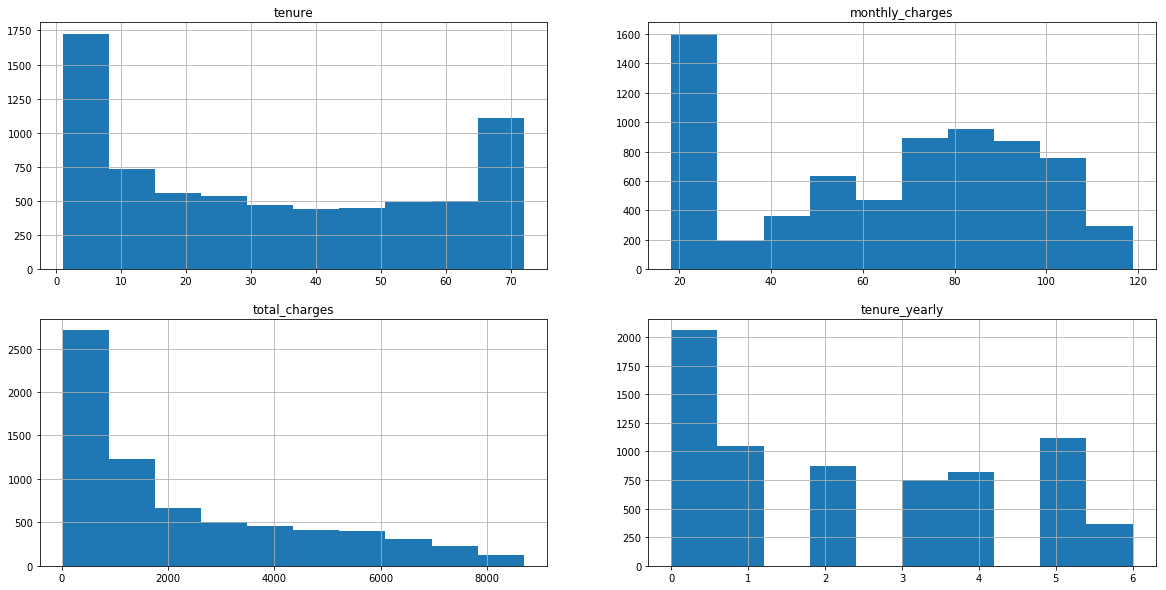

In [8]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = tdf[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=10, density=False, cumulative=False, log=False)

#### Boxplots of Tenures and Charges

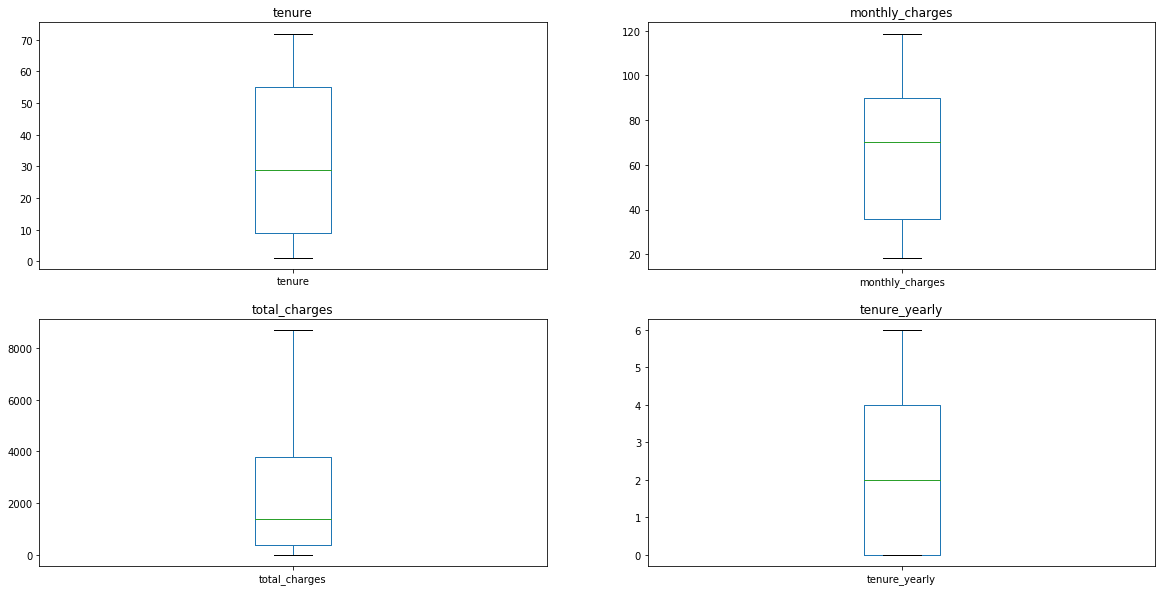

In [9]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = tdf[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.plot.box()#logy=True)

In [10]:
### Shorthand dataframe names for simplicity, and data manip without
### Changing original Dataframes
fdf = first_years_df.copy()#[['tenure','streaming_services','internet_service_type_id','contract_type_id','monthly_charges','churn_encode']]
sdf = senior_df.copy()#[['tenure','streaming_services','internet_service_type_id','contract_type_id','monthly_charges','churn_encode']]

### Ttest of Churn between two populations

In [11]:
p_value_of_ttest = (list(ttest_ind(sdf['churn_encode'],fdf['churn_encode'])))[1]

In [12]:
p_value_of_ttest

9.215808687242088e-167

The P value is MUCH less than 0.05, therefore the populations are significantly different

Let's check the Churn drivers between the two populations

### Churn Drivers for Year 1's different than Long Terms

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


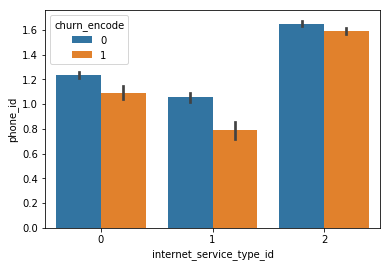

In [13]:
sns.barplot('internet_service_type_id', 'phone_id', data=tdf, hue='churn_encode')

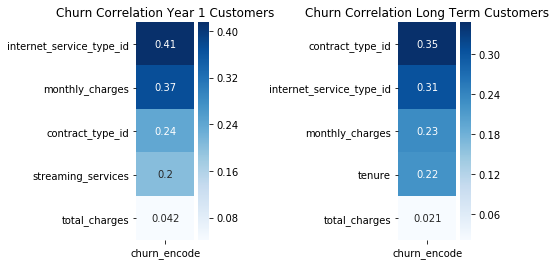

In [39]:

plt.subplot(141)
plt.title('Churn Correlation Year 1 Customers')
sns.heatmap((fdf.corr()[['churn_encode']].drop('churn_encode')).abs().sort_values('churn_encode', ascending = False),annot = True, cmap = 'Blues')

plt.subplot(144)
plt.title('Churn Correlation Long Term Customers')
sns.heatmap((sdf.corr()[['churn_encode']].drop('churn_encode')).abs().sort_values('churn_encode', ascending = False),annot = True, cmap = 'Blues')


Grab important fields for different DataFrames

In [15]:
sdf = sdf[['contract_type_id', 'internet_service_type_id','monthly_charges','tenure','churn_encode','total_charges']]

In [16]:
fdf = fdf[['internet_service_type_id','monthly_charges','contract_type_id','streaming_services','total_charges','churn_encode']]


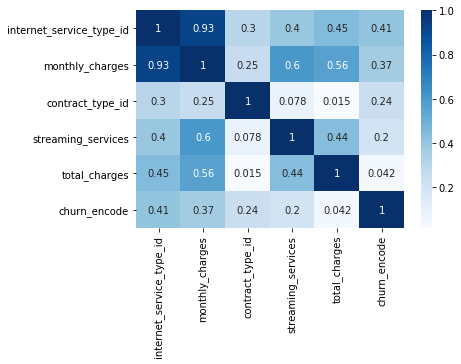

In [38]:
sns.heatmap((fdf.corr()).abs(),cmap='Blues',annot=True)

## 1 Year Contracts vs m2m contracts at 12 month point

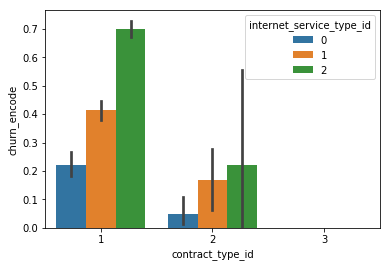

In [18]:
tenure_13 = tdf[tdf['tenure'] <= 13]
sns.barplot('contract_type_id', 'churn_encode', data=tenure_13, hue='internet_service_type_id')

### Model Building Based on these fields

Train Test Split + Scaling

In [19]:
train_sdf, test_sdf = ppr.scale_split_data(*train_test_split(sdf,random_state=55))
train_fdf, test_fdf = ppr.scale_split_data(*train_test_split(fdf,random_state=22))
#train,test = ppr.scale_split_data(*train_test_split(tdf,random_state =55))

Drop non-scaled fields in all 4 dataframes

In [20]:
train_sdf.drop(['monthly_charges','total_charges','total_charges_scaled'],axis =1,inplace = True)
test_sdf.drop(['monthly_charges','total_charges','total_charges_scaled'],axis =1,inplace = True)
train_fdf.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)
test_fdf.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)


Senior Logisitc Regression prediction

In [21]:
logit_sdf = LogisticRegression()
logit_sdf.fit(train_sdf.drop(columns='churn_encode'),train_sdf[['churn_encode']])
sdf_pred_train = logit_sdf.predict(train_sdf.drop(columns='churn_encode'))
sdf_pred_train_proba = logit_sdf.predict_proba(train_sdf.drop(columns='churn_encode'))
sdf_pred = logit_sdf.predict(test_sdf.drop(columns='churn_encode'))
sdf_pred_proba = logit_sdf.predict_proba(test_sdf.drop(columns='churn_encode'))


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
(test_sdf['churn_encode'] == sdf_pred).sum() / test_sdf.shape[0]

0.8452674897119341

##### Classification report:

In [23]:
print(classification_report(test_sdf['churn_encode'],sdf_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1019
           1       0.57      0.16      0.25       196

   micro avg       0.85      0.85      0.85      1215
   macro avg       0.72      0.57      0.58      1215
weighted avg       0.81      0.85      0.81      1215



In [40]:
confusion_matrix(test_sdf['churn_encode'],sdf_pred)

array([[996,  23],
       [165,  31]])

Freshman Logistic Regression prediction

In [24]:
logit_fdf = LogisticRegression()
logit_fdf.fit(train_fdf.drop(columns='churn_encode'),train_fdf[['churn_encode']])
fdf_pred_train = logit_fdf.predict(train_fdf.drop(columns='churn_encode'))
fdf_pred = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))
fdf_pred_train_proba = logit_fdf.predict_proba(train_fdf.drop(columns='churn_encode'))
fdf_pred_proba = logit_fdf.predict_proba(test_fdf.drop(columns='churn_encode'))



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print(f"Accuracy: {(test_fdf['churn_encode'] == fdf_pred).sum() / test_fdf.shape[0]*100} ")

Accuracy: 72.24264705882352 


##### Classification report:

In [26]:
print(classification_report(test_fdf['churn_encode'],fdf_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       287
           1       0.74      0.63      0.68       257

   micro avg       0.72      0.72      0.72       544
   macro avg       0.73      0.72      0.72       544
weighted avg       0.72      0.72      0.72       544



In [42]:
confusion_matrix(test_fdf['churn_encode'],fdf_pred)

array([[230,  57],
       [ 94, 163]])

## Running other classification models

### Tree:

In [27]:
tree_fdf = DTree()

In [28]:
tree_fdf.fit(train_fdf.drop(columns='churn_encode'),train_fdf[['churn_encode']])
tfdf_pred = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))


In [29]:
print(f"Accuracy: {(test_fdf['churn_encode'] == tfdf_pred).sum() / test_fdf.shape[0]*100} ")

Accuracy: 72.24264705882352 


### KNN: 

In [30]:
knn_fdf = KNClass()

In [31]:
knn_fdf.fit(train_fdf.drop(columns='churn_encode'),train_fdf[['churn_encode']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
kfdf_pred = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))

In [33]:
print(f"Accuracy: {(test_fdf['churn_encode'] == kfdf_pred).sum() / test_fdf.shape[0]*100} ")

Accuracy: 72.24264705882352 


## Conclusion for other models:

With the last three classification models, they all yielded the same results for the dataset. 

# Overall conclusions

Customers churn correlates differently depending on how long they have been with a customer. 

Controlling for tenure leads to more accurate prediction results

## CSV Creation

In [34]:
fdf_train_pp = logit_fdf.predict(train_fdf.drop(columns='churn_encode'))
fdf_train_pr = logit_fdf.predict_proba(train_fdf.drop(columns='churn_encode'))
fdf_test_pp = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))
fdf_test_pr = logit_fdf.predict_proba(test_fdf.drop(columns='churn_encode'))

sdf_train_pp = logit_sdf.predict(train_sdf.drop(columns='churn_encode'))
sdf_train_pr = logit_sdf.predict_proba(train_sdf.drop(columns='churn_encode'))
sdf_test_pp = logit_sdf.predict(test_sdf.drop(columns='churn_encode'))
sdf_test_pr = logit_sdf.predict_proba(test_sdf.drop(columns='churn_encode'))

In [ ]:
test_fdf['predict'] = fdf_test_pp
#test_fdf['customer id']=
test_fdf = test_fdf[['predict']]
train_fdf['predict'] = fdf_train_pp
train_fdf = train_fdf[['predict']]

In [ ]:
test_fdf['predicted probability'] = fdf_test_pr[:,1]
train_fdf['predicted probability'] = fdf_train_pr[:,1]

In [ ]:
test_sdf['predict'] = sdf_test_pp
test_sdf = test_sdf[['predict']]
train_sdf['predict'] = sdf_train_pp
train_sdf = train_sdf[['predict']]
test_sdf['predicted probability'] = sdf_test_pr[:,1]
train_sdf['predicted probability'] = sdf_train_pr[:,1]

In [ ]:
df = pd.concat([train_sdf,test_sdf,train_fdf,test_fdf])

In [ ]:
df['customer id'] = total_df.customer_id

In [ ]:
df.to_csv('predictions.csv')